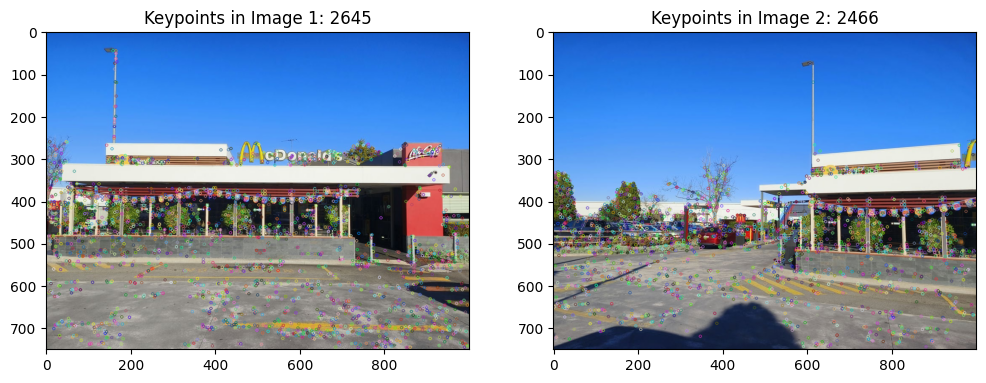

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from skimage.util import random_noise


class SiftDetector():
    def __init__(self, norm="L2", params=None):
        self.detector = self.get_detector(params)
        self.norm = norm

    def get_detector(self, params):
        if params is None:
            params = {
                "n_features": 0,
                "n_octave_layers": 3,
                "contrast_threshold": 0.03,
                "edge_threshold": 10,
                "sigma": 1.6
            }

        detector = cv2.SIFT_create(
            nfeatures=params["n_features"],
            nOctaveLayers=params["n_octave_layers"],
            contrastThreshold=params["contrast_threshold"],
            edgeThreshold=params["edge_threshold"],
            sigma=params["sigma"]
        )

        return detector


# Load the first image
image_path1 = 'IMG_20240619_141449.jpg'
image1 = cv2.imread(image_path1)
gray1 = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)

# Create SIFT detector
sift = SiftDetector(params=None)

# Detect keypoints and descriptors in the first image
keypoints1, descriptors1 = sift.detector.detectAndCompute(gray1, None)
img1_kp = cv2.drawKeypoints(image1, keypoints1, image1)
img1_kp = cv2.cvtColor(img1_kp, cv2.COLOR_BGR2RGB)

# Load the second image
image_path2 = 'IMG_20240619_141459.jpg'
image2 = cv2.imread(image_path2)
gray2 = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)

# Detect keypoints and descriptors in the second image
keypoints2, descriptors2 = sift.detector.detectAndCompute(gray2, None)
img2_kp = cv2.drawKeypoints(image2, keypoints2, image2)
img2_kp = cv2.cvtColor(img2_kp, cv2.COLOR_BGR2RGB)

# Display the images with keypoints
plt.figure(figsize=(12, 6))
plt.subplot(121), plt.imshow(img1_kp), plt.title(
    f'Keypoints in Image 1: {len(keypoints1)}')
plt.subplot(122), plt.imshow(img2_kp), plt.title(
    f'Keypoints in Image 2: {len(keypoints2)}')
plt.show()

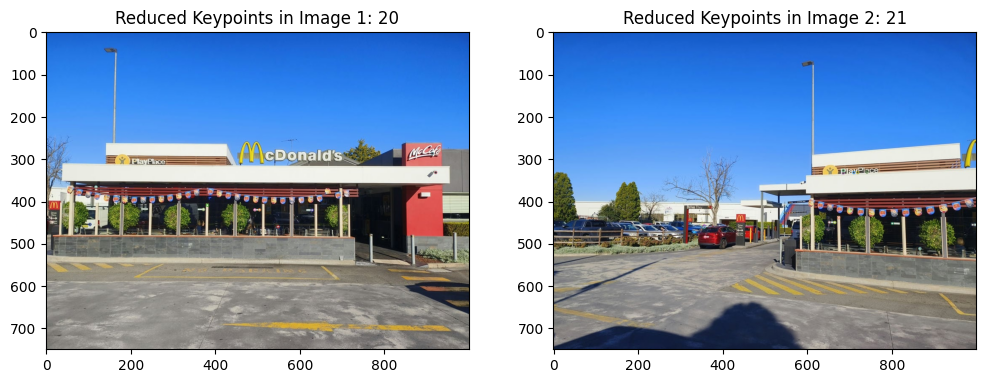

In [2]:
image_path1 = 'IMG_20240619_141449.jpg'
image1 = cv2.imread(image_path1)
gray1 = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)

image_path2 = 'IMG_20240619_141459.jpg'
image2 = cv2.imread(image_path2)
gray2 = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)

params = {
    "n_features": 20,
    "n_octave_layers": 3,
    "contrast_threshold": 0.25,  # Increase contrast_threshold
    "edge_threshold": 10,
    "sigma": 1.6
}

# Create SIFT detector with modified contrast_threshold
sift_reduced = SiftDetector(params=params)

# Detect keypoints and descriptors in the first image with reduced keypoints
keypoints1_reduced, descriptors1_reduced = sift_reduced.detector.detectAndCompute(
    gray1, None)
img1_kp_reduced = cv2.drawKeypoints(image1, keypoints1_reduced, None)
img1_kp_reduced = cv2.cvtColor(img1_kp_reduced, cv2.COLOR_BGR2RGB)

# Detect keypoints and descriptors in the second image with reduced keypoints
keypoints2_reduced, descriptors2_reduced = sift_reduced.detector.detectAndCompute(
    gray2, None)
img2_kp_reduced = cv2.drawKeypoints(image2, keypoints2_reduced, None)
img2_kp_reduced = cv2.cvtColor(img2_kp_reduced, cv2.COLOR_BGR2RGB)

# Display the images with reduced keypoints
plt.figure(figsize=(12, 6))
plt.subplot(121), plt.imshow(img1_kp_reduced), plt.title(
    f'Reduced Keypoints in Image 1: {len(keypoints1_reduced)}')
plt.subplot(122), plt.imshow(img2_kp_reduced), plt.title(
    f'Reduced Keypoints in Image 2: {len(keypoints2_reduced)}')
plt.show()

In [3]:
from skimage.util import random_noise

image_path1 = 'IMG_20240619_141449.jpg'
image1 = cv2.imread(image_path1)

image_path2 = 'IMG_20240619_141459.jpg'
image2 = cv2.imread(image_path2)

# Scale images
scale_factor = 1.2
img1_scaled = cv2.resize(image1, None, fx=scale_factor, fy=scale_factor)
img2_scaled = cv2.resize(image2, None, fx=scale_factor, fy=scale_factor)

# Rotate images
image_path1 = 'IMG_20240619_141449.jpg'
image1 = cv2.imread(image_path1)

image_path2 = 'IMG_20240619_141459.jpg'
image2 = cv2.imread(image_path2)

angle = 60
h, w = image1.shape[:2]
M = cv2.getRotationMatrix2D((w/2, h/2), angle, 1)
img1_rotated = cv2.warpAffine(image1, M, (w, h))
img2_rotated = cv2.warpAffine(image2, M, (w, h))

# Add salt and pepper noise
image_path1 = 'IMG_20240619_141449.jpg'
image1 = cv2.imread(image_path1)

image_path2 = 'IMG_20240619_141459.jpg'
image2 = cv2.imread(image_path2)

img1_noisy = (random_noise(image1, mode='s&p') * 255).astype(np.uint8)
img2_noisy = (random_noise(image2, mode='s&p') * 255).astype(np.uint8)

In [4]:
def detect_and_draw_keypoints(img):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    kp, des = sift.detector.detectAndCompute(gray, None)
    img_kp = cv2.drawKeypoints(
        img, kp, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
    return kp, img_kp

In [5]:
sift = SiftDetector(params=params)

kp1, img1_scaled_kp = detect_and_draw_keypoints(img1_scaled)
kp2, img2_scaled_kp = detect_and_draw_keypoints(img2_scaled)
kp3, img1_rotated_kp = detect_and_draw_keypoints(img1_rotated)
kp4, img2_rotated_kp = detect_and_draw_keypoints(img2_rotated)
kp5, img1_noisy_kp = detect_and_draw_keypoints(img1_noisy)
kp6, img2_noisy_kp = detect_and_draw_keypoints(img2_noisy)

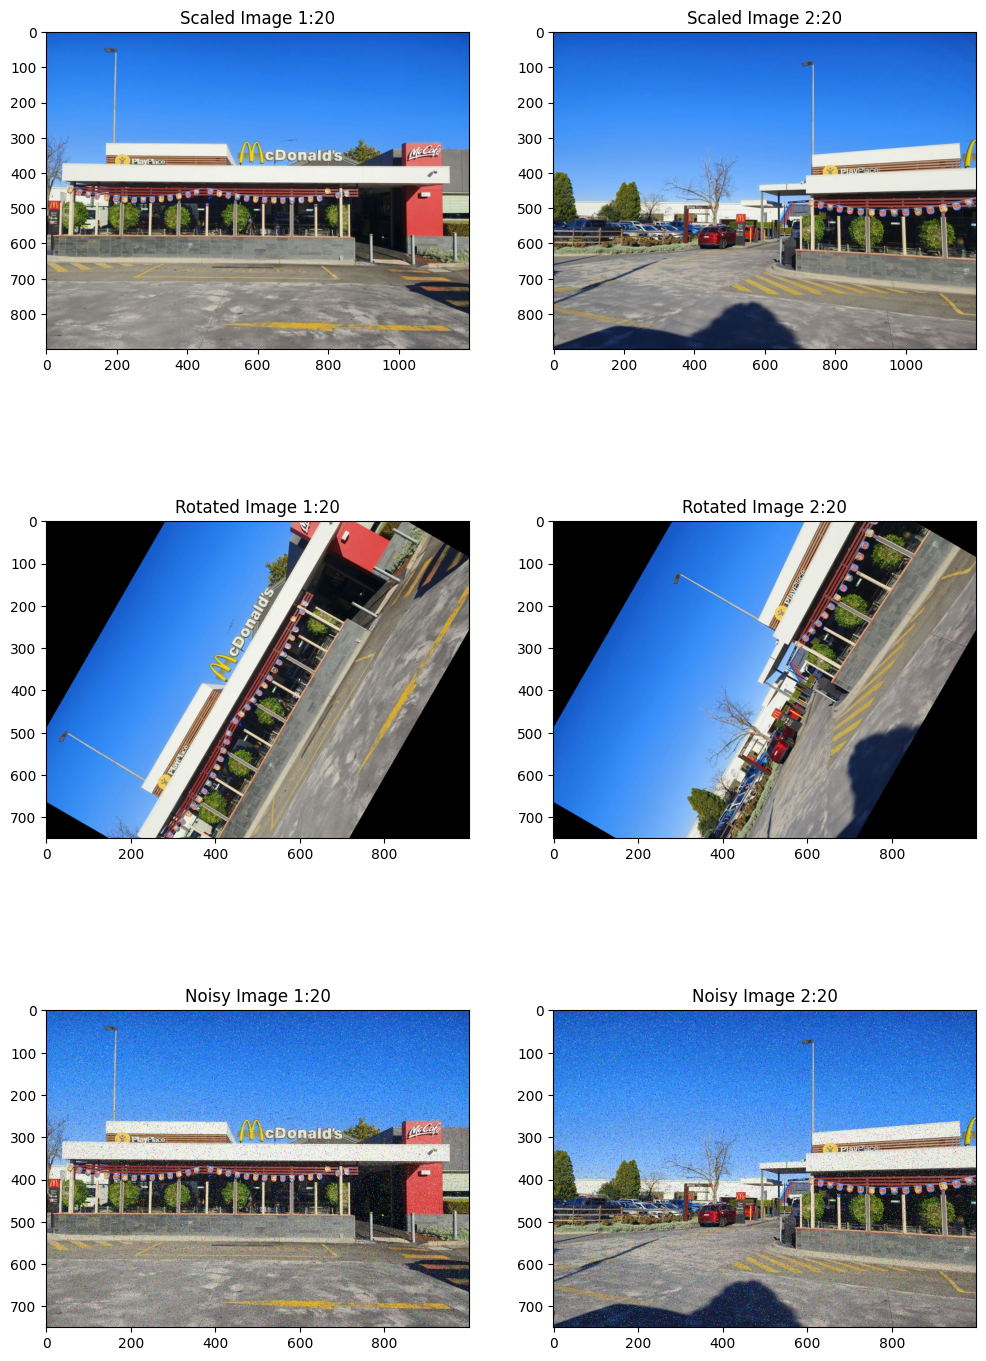

In [6]:
plt.figure(figsize=(12, 18))
plt.subplot(321), plt.imshow(cv2.cvtColor(img1_scaled_kp,
                                          cv2.COLOR_BGR2RGB)), plt.title(f'Scaled Image 1:{len(kp1)}')
plt.subplot(322), plt.imshow(cv2.cvtColor(img2_scaled_kp,
                                          cv2.COLOR_BGR2RGB)), plt.title(f'Scaled Image 2:{len(kp2)}')
plt.subplot(323), plt.imshow(cv2.cvtColor(img1_rotated_kp,
                                          cv2.COLOR_BGR2RGB)), plt.title(f'Rotated Image 1:{len(kp3)}')
plt.subplot(324), plt.imshow(cv2.cvtColor(img2_rotated_kp,
                                          cv2.COLOR_BGR2RGB)), plt.title(f'Rotated Image 2:{len(kp4)}')
plt.subplot(325), plt.imshow(cv2.cvtColor(img1_noisy_kp,
                                          cv2.COLOR_BGR2RGB)), plt.title(f'Noisy Image 1:{len(kp5)}')
plt.subplot(326), plt.imshow(cv2.cvtColor(img2_noisy_kp,
                                          cv2.COLOR_BGR2RGB)), plt.title(f'Noisy Image 2:{len(kp6)}')
plt.show()

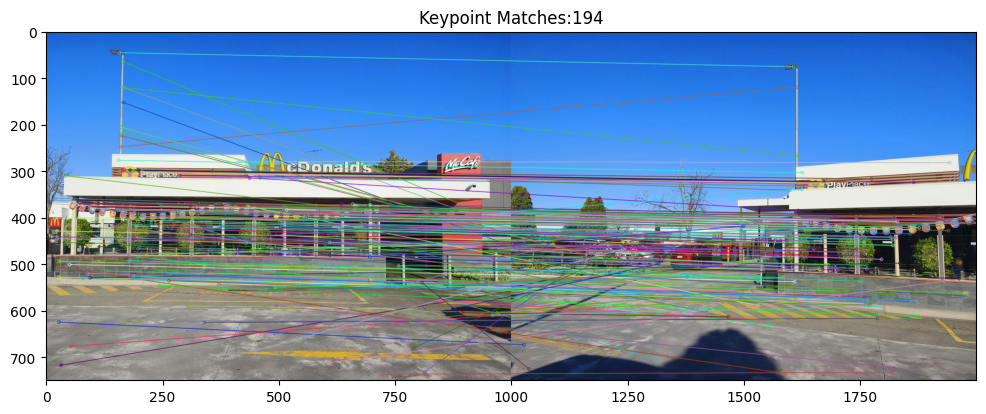

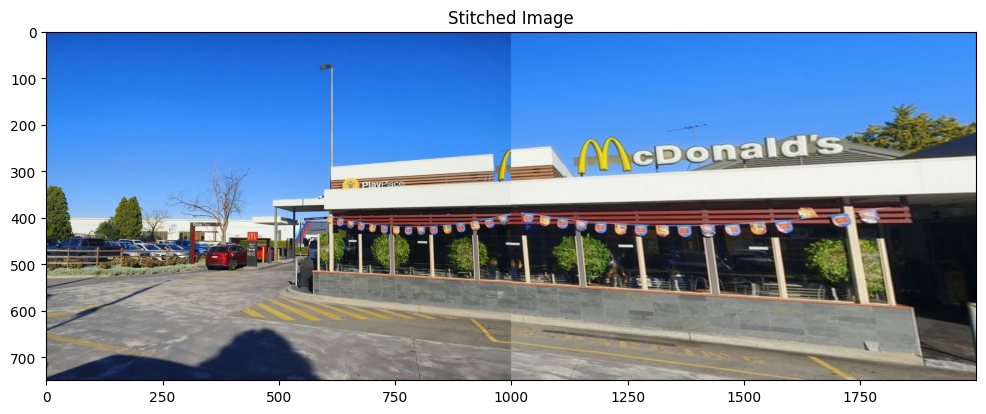

In [16]:
bf = cv2.BFMatcher()
matches = bf.knnMatch(descriptors1, descriptors2, k=2)

# Apply ratio test
good_matches = []
for m, n in matches:
    if m.distance < 0.8 * n.distance:
        good_matches.append(m)

# Draw matches
img_matches = cv2.drawMatches(image1, keypoints1, image2, keypoints2, good_matches, None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

# Display matches
plt.figure(figsize=(12, 6))
plt.imshow(cv2.cvtColor(img_matches, cv2.COLOR_BGR2RGB))
plt.title(f'Keypoint Matches:{len(good_matches)}')
plt.show()

# Extract location of good matches
src_pts = np.float32([keypoints1[m.queryIdx].pt for m in good_matches]).reshape(-1, 2)
dst_pts = np.float32([keypoints2[m.trainIdx].pt for m in good_matches]).reshape(-1, 2)

# Find homography
M, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 5.0)
matches_mask = mask.ravel().tolist()

# Warp images
h, w, _ = image1.shape
img1_warped = cv2.warpPerspective(image1, M, (w + image2.shape[1], h))

stitched_img = img1_warped.copy()
stitched_img[0:image2.shape[0], 0:image2.shape[1]] = image2

plt.figure(figsize=(12, 6))
plt.imshow(cv2.cvtColor(stitched_img, cv2.COLOR_BGR2RGB))
plt.title('Stitched Image')
plt.show()